# **This lab is for understanding various performace parameters taught during the class, you need to add all the parameters and variations.**



Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Data Collection & Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

In [ ]:
# number of rows and columns in the dataset
heart_data.shape

In [ ]:
# getting some info about the data
heart_data.info()

In [ ]:
# checking for missing values
heart_data.isnull().sum()

In [ ]:
# statistical measures about the data
heart_data.describe()

In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

In [ ]:
print(Y)

Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

Model Training

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

Model Evaluation

**Accuracy Score**

It is most common performance metric for classification algorithms. It may be defined as the number of correct predictions made as a ratio of all predictions made. We can easily calculate it by confusion matrix with the help of following formula −

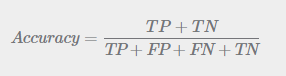

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(training_data_accuracy)

In [ ]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(test_data_accuracy)

In [ ]:
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

# Confusion Matrix

It is the easiest way to measure the performance of a classification problem where the output can be of two or more type of classes. A confusion matrix is nothing but a table with two dimensions viz. “Actual” and “Predicted” and furthermore, both the dimensions have “True Positives (TP)”, “True Negatives (TN)”, “False Positives (FP)”, “False Negatives (FN)” as shown below −

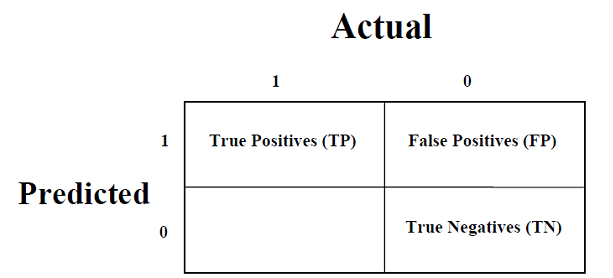

Explanation of the terms associated with confusion matrix are as follows −

True Positives (TP) − It is the case when both actual class & predicted class of data point is 1.

True Negatives (TN) − It is the case when both actual class & predicted class of data point is 0.

False Positives (FP) − It is the case when actual class of data point is 0 & predicted class of data point is 1.

False Negatives (FN) − It is the case when actual class of data point is 1 & predicted class of data point is 0.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

In [ ]:
tn, fp, fn, tp = cf_matrix.ravel()

print(tn, fp, fn, tp)

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

**Precision**

Precision is the ratio of number of True Positive to the total number of Predicted Positive. It measures, out of the total predicted positive, how many are actually positive.
 image.png

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
# precision for training data predictions
precision_train = precision_score(Y_train, X_train_prediction)
print('Training data Precision =', precision_train)

In [ ]:
# precision for test data predictions
precision_test = precision_score(Y_test, X_test_prediction)
print('Test data Precision =', precision_test)

**Recall**

Recall is the ratio of number of True Positive to the total number of Actual Positive. It measures, out of the total actual positive, how many are predicted as True Positive.

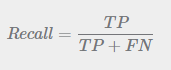

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# recall for training data predictions
recall_train = recall_score(Y_train, X_train_prediction)
print('Training data Recall =', recall_train)

In [ ]:
# recall for test data predictions
recall_test = recall_score(Y_test, X_test_prediction)
print('Test data Recall =', recall_test)

**F1 Score**

F1 Score is an important evaluation metric for binary classification that combines Precision & Recall. F1 Score is the harmonic mean of Precision & Recall.

𝑭𝟏 = 𝟐 ∗ (𝒑𝒓𝒆𝒄𝒊𝒔𝒊𝒐𝒏 ∗ 𝒓𝒆𝒄𝒂𝒍𝒍) / (𝒑𝒓𝒆𝒄𝒊𝒔𝒊𝒐𝒏 + 𝒓𝒆𝒄𝒂𝒍𝒍)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# F1 score for training data predictions
f1_score_train = f1_score(Y_train, X_train_prediction)
print('Training data F1 Score =', f1_score_train)

In [ ]:
# F1 Score for test data predictions
f1_score_test = recall_score(Y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

**Precision, Recall, & F1 Score - function**

In [ ]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [ ]:
# classification metrics for training data
precision_recall_f1_score(Y_train, X_train_prediction)

In [ ]:
# classification metrics for test data
precision_recall_f1_score(Y_test, X_test_prediction)

**Loss**

 Log loss, also known as logarithmic loss or cross-entropy loss, is a common evaluation metric for binary classification models. It measures the performance of a model by quantifying the difference between predicted probabilities and actual values. Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification), penalizing inaccurate predictions with higher values. Lower log-loss indicates better model performance.

Log Loss is the most important classification metric based on probabilities. It’s hard to interpret raw log-loss values, but log-loss is still a good metric for comparing models. For any given problem, a lower log loss value means better predictions.

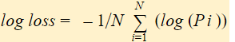



In [ ]:
from sklearn.metrics import log_loss
# loss on training data
X_train_prediction = model.predict(X_train)
training_data_loss = log_loss(Y_train, X_train_prediction, eps=1e-15)
print(training_data_loss)

In [ ]:
# loss on test data
X_test_prediction = model.predict(X_test)
test_data_loss = log_loss(Y_test, X_test_prediction, eps=1e-15)
print(test_data_loss)

**ROC**

AUC (Area Under Curve)-ROC (Receiver Operating Characteristic) is a performance metric, based on varying threshold values, for classification problems. As name suggests, ROC is a probability curve and AUC measure the separability. In simple words, AUC-ROC metric will tell us about the capability of model in distinguishing the classes. Higher the AUC, better the model.






Mathematically, it can be created by plotting TPR (True Positive Rate) i.e. Sensitivity or recall vs FPR (False Positive Rate) i.e. 1-Specificity, at various threshold values. Following is the graph showing ROC, AUC having TPR at y-axis and FPR at x-axis −

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(Y_test, X_test_prediction)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()